In [248]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
import math

In [254]:
import pandas as pd
import numpy as np
import re
import nltk
df = pd.read_csv('C:\\Ashish\\Project\\dataset\\trainset1.csv')#,nrows = 1500)
df.text[:5]

0    #weather Another #fakenews video @CNN Anderson...
1    Staring Down Hurricane Florence via NASA https...
2    #hurricane #florence http:// tra.one/tcphurFlo...
3    Hurricane Florence is still moving through the...
4    Houston is collecting donations for Hurricane ...
Name: text, dtype: object

In [255]:
df['original_text'] = df['text']

In [256]:
df.category.value_counts()

1    1009
2     588
3     307
4     118
Name: category, dtype: int64

In [257]:
# #SAMPLING
# from sklearn.utils import resample

# # Separate majority and minority classes
# df_majority = df[df.category==1]
# df_minority = df[df.category!=1]

# # Downsample majority class
# df_majority_downsampled = resample(df_majority, 
#                                  replace=False,    # sample without replacement
#                                  n_samples=1009,     # to match minority class
#                                  random_state=123) # reproducible results
 
# # Combine minority class with downsampled majority class
# df_downsampled = pd.concat([df_majority_downsampled, df_minority])


# df = df_downsampled

# # Display new class counts
# df.category.value_counts()

In [258]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt  

# remove twitter handles (@user)
df['text'] = np.vectorize(remove_pattern)(df['text'], "@[\w]*")

In [259]:
#TO DO - REMOVE ASCII EXTENDED
for i in range(len(df)):
    tweet = df.iloc[i,df.columns.get_loc('text')]
    tweet = tweet.lower()
    tweet = re.sub(r"\S+\/.\S+ *\S+|.\S+html|\S+-\S+|\d*\/\d+|\d+|\S+%\S+|\S+:\S*|\S+=\S+|.#\S+", "", tweet)
    tweet = tweet.encode("ascii", errors="ignore").decode()
    df.iloc[i,df.columns.get_loc('text')] = tweet

In [260]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
stop_words = set(stopwords.words('english'))
for i in range(len(df)):
    tweet = df.iloc[i,df.columns.get_loc('text')]
    word_tokens = word_tokenize(tweet) 
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    filtered_sentence = [] 
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    tweet = ' '.join(filtered_sentence)
    df.iloc[i,df.columns.get_loc('text')] = tweet

In [226]:
custom_words = ['via','rt','fav','…','am','et','pm','n\'t','y\'all']
for i in range(len(df)):
    tweet = df.iloc[i,df.columns.get_loc('text')]
    querywords = tweet.split()
    resultwords  = [word for word in querywords if word.lower() not in custom_words]
    result = ' '.join(resultwords)
    df.iloc[i,df.columns.get_loc('text')] = result

In [227]:
import string
remove = string.punctuation + ".‘’\''“”°…-—––•・®.:#"
for i in range(len(df)):
    tweet = df.iloc[i,df.columns.get_loc('text')]
    tweet = ' '.join(word.strip(remove) for word in tweet.split())
    tweet = tweet.strip()
    df.iloc[i,df.columns.get_loc('text')] = tweet

In [228]:
# Lemmatize with POS Tag
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

# 1. Init Lemmatizer
lemmatizer = WordNetLemmatizer()

for i in range(len(df)):
    tweet = df.iloc[i,df.columns.get_loc('text')]
    tweet =([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(tweet)])
    tweet = ' '.join(tweet)
    df.iloc[i,df.columns.get_loc('text')] = tweet

In [229]:
# REVIEW NEEDED
import nltk
words = set(nltk.corpus.words.words())
for i in range(len(df)):
    tweet = df.iloc[i,df.columns.get_loc('text')]
    tweet = ' '.join(word for word in tweet.split() if len(word)>3)
    df.iloc[i,df.columns.get_loc('text')] = tweet

In [230]:
# count = df['text'].str.split().str.len()
# df = df[~(count < 2)]

In [231]:
#To check number of words and verify absence of sentences with length less than 3
# for index, row in df.iterrows():
#     print(len(row.text.split()))

In [232]:
# for index, row in df.iterrows():
#     print(row.text)

In [233]:
# df.to_csv('C:\\Ashish\\Project\\dataset\\clean-trainset1.csv')

In [234]:
#----------END--OF--PRE-PROCESSING----------#

In [204]:
df2 = df[['text','category']]

In [46]:
df2 = df2[pd.notnull(df2['text'])]

In [51]:
df2['category_id'] = df2['category'].factorize()[0]
category_id_df = df2[['category', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'category']].values)
df2.head(40)

,text,category,category_id
0,weather another video anderson cooper hype flo...,2,0
1,star hurricane florence nasa,2,0
3,hurricane florence still move atlantic morning...,1,1
4,houston collect donation hurricane florence vi...,3,2
6,still collect supply victim hurricane florence...,3,2
7,whats surprising hurricane florence thrive abn...,2,0
8,denim bunny hurricane florence hair,1,1
9,listen zello cajun navy hurricane florence gro...,3,2
10,grandmama know wrong talk hurricane aint take ...,1,1
11,hurricaneupdate euro,2,0


In [2]:
# import matplotlib.pyplot as plt
# fig = plt.figure(figsize=(8,6))
# df2.groupby('category').text.count().plot.bar(ylim=0)
# plt.show()

In [3]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf = TfidfVectorizer(sublinear_tf=True, min_df=0, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
# # tfidf = TfidfVectorizer()
# features = tfidf.fit_transform(df2.text).toarray()
# labels = df2.category_id
# features.shape

In [4]:
# from sklearn.feature_selection import chi2

# N = 2
# for category, category_id in sorted(category_to_id.items()):
#   features_chi2 = chi2(features, labels == category_id)
#   indices = np.argsort(features_chi2[0])
#   feature_names = np.array(tfidf.get_feature_names())[indices]
#   unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
#   bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
#   print("# '{}':".format(category))
#   print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
#   print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

In [5]:
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfTransformer
# from sklearn.naive_bayes import MultinomialNB

# X_train, X_test, y_train, y_test = train_test_split(df2['text'], df2['category'], random_state = 0)
# count_vect = CountVectorizer()
# X_train_counts = count_vect.fit_transform(X_train)
# tfidf_transformer = TfidfTransformer()
# X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

# clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [6]:
# #Test one sentence
# print(clf.predict(count_vect.transform(["help donate hurricane"])))

In [7]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import LinearSVC

# from sklearn.model_selection import cross_val_score

# models = [
#     LinearSVC(),
#     MultinomialNB(),
#     LogisticRegression(random_state=0),
# ]
# CV = 5
# cv_df = pd.DataFrame(index=range(CV * len(models)))
# entries = []
# for model in models:
#   model_name = model.__class__.__name__
#   accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
#   for fold_idx, accuracy in enumerate(accuracies):
#     entries.append((model_name, fold_idx, accuracy))
# cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

# import seaborn as sns

# sns.boxplot(x='model_name', y='accuracy', data=cv_df)
# sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
#               size=8, jitter=True, edgecolor="gray", linewidth=2)
# plt.show()

In [8]:
# cv_df.groupby('model_name').accuracy.mean()

In [11]:
model = LinearSVC(random_state=0)

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.25, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.category.values, yticklabels=category_id_df.category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

NameError: name 'LinearSVC' is not defined

In [10]:
from IPython.display import display
pd.set_option('display.max_rows', 500)
for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 10:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['category', 'text']])
      print('')

In [153]:
df.category.value_counts()

1    985
2    580
3    304
4     84
Name: category, dtype: int64

In [154]:
df2.text[286]

'astronaut take hurricane florence photo truly chill'

In [94]:
from IPython.display import display

for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 10:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df2.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['category', 'text']])
      print('')

'2' predicted as '1' : 35 examples.


,category,text
1322,2,watch hurricane florence flood
1579,2,hurricane florence hurricane warning issue par...
1483,2,people like gore make money climate change imm...
447,2,science hurricane florence mile large rain tha...
357,2,tower american flag kevin becomes hurricane fl...
1721,2,hurricane florence intensified fast still know...
1639,2,direct view hurricane florence come already ri...
154,2,track hurricane florence path
83,2,black people make everything joke twitter page...
1197,2,witness hurricane florence



'3' predicted as '1' : 15 examples.


,category,text
1381,3,fkec sends crew assist hurricane florence rest...
1239,3,discuss hurricane florence president donald tr...
1131,3,watch news cant seem wrap mind around donate w...
1063,3,affected think hope love stay safe continue po...
787,3,waffle house index play role fema hurricane re...
731,3,thanks costal federal credit union week wait d...
1769,3,please link purchase proceeds family need hurr...
930,3,repost train cross disaster worker deployed en...
1398,3,bragging right student lead food drive collect...
1586,3,amtrak begin resume service hurricane florence



'1' predicted as '2' : 47 examples.


,category,text
662,1,problem solve
699,1,south carolina could suffer devastate flood ev...
1176,1,preparation glass gondola remove skywheel myrt...
1461,1,hurricane update outer band rain approach coas...
1732,1,stormtracker north carolina
71,1,hurricane florence first major hurricane seaso...
1374,1,hurricane florence this really scare lead fore...
1932,1,confidence remains high potential impact like ...
41,1,hurricane florence tropical cyclone update atl...
216,1,dare someone loot consider loot company youre ...



'3' predicted as '2' : 12 examples.


,category,text
758,3,response revive flood remember flood read
1144,3,imagine boarding leave home coast know come ba...
959,3,pewaukee organization save life animal left be...
1092,3,president donald trump administration provide ...
1020,3,glad recognition numerous outlet like name reg...
133,3,raise little hour
1587,3,reunite impact lose found poison helpline emer...
1137,3,trump hurricane florence have good time
660,3,michael jordan grow play high school basketbal...
692,3,cellular step give customer signal


In [95]:
from sklearn import metrics

def to_str(var):
    return str(list(np.reshape(np.asarray(var), (1, np.size(var)))[0]))[1:-1]

cat = (df2['category'].unique())
l = []

for element in cat:
    l.append('' + to_str(element))
print(metrics.classification_report(y_test, y_pred, target_names = l))

              precision    recall  f1-score   support

           1       0.62      0.64      0.63       151
           2       0.60      0.71      0.65       137
           3       0.80      0.66      0.72        79
           4       0.80      0.20      0.32        20

   micro avg       0.64      0.64      0.64       387
   macro avg       0.70      0.55      0.58       387
weighted avg       0.66      0.64      0.64       387



In [235]:
import pandas as pd
import numpy as np
import re
import nltk
train_df = pd.read_csv('C:\\Ashish\\Project\\dataset\\clean-trainset1.csv')#,nrows = 1500)
train_df.text[:5]

0    weather another video anderson cooper hype flo...
1                         star hurricane florence nasa
2    hurricane florence still move atlantic morning...
3    houston collect donation hurricane florence vi...
4    still collect supply victim hurricane florence...
Name: text, dtype: object

In [236]:
# df['category_id'] = df['category'].factorize()[0]
# category_id_df = df[['category', 'category_id']].drop_duplicates().sort_values('category_id')
# category_to_id = dict(category_id_df.values)
# id_to_category = dict(category_id_df[['category_id', 'category']].values)
# df.head(40)

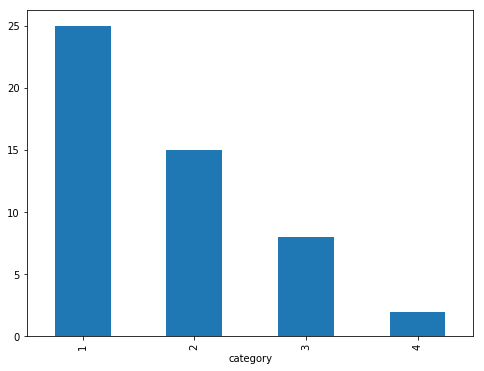

In [237]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('category').text.count().plot.bar(ylim=0)
plt.show()

In [238]:
from sklearn.model_selection import train_test_split
import seaborn as sns 

def train(classifier, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.08, random_state=33)
 
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("Accuracy: %s" % classifier.score(X_test, y_test))
    
#     from sklearn.metrics import confusion_matrix

#     conf_mat = confusion_matrix(y_test, y_pred)
#     fig, ax = plt.subplots(figsize=(10,10))
#     sns.heatmap(conf_mat, annot=True, fmt='d',
#                 xticklabels=category_id_df.category.values, yticklabels=category_id_df.category.values)
#     plt.ylabel('Actual')
#     plt.xlabel('Predicted')
#     plt.show()
    
    return classifier

In [239]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

trial = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english'),
                             min_df=5,norm='l2')),
    ('classifier', MultinomialNB(alpha=0.30)),
])
 
train(trial, train_df.text, train_df.category)

Accuracy: 0.7579617834394905


Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=5,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=...      vocabulary=None)), ('classifier', MultinomialNB(alpha=0.3, class_prior=None, fit_prior=True))])

In [240]:
#---------------Classifier trained---------------

In [241]:
#Predict values (Assume pre processing done)

In [242]:
# dfx = pd.read_csv('C:\\Ashish\\Project\\dataset\\clean-trainset1.csv')#,nrows = 1500)

In [243]:
# X = df.text
# y = df.category

In [244]:
predicted_categories = trial.predict(df.text)

In [245]:
len(predicted_categories)

50

In [246]:
df['category'] = pd.Series(predicted_categories)

In [176]:
# qqq = pd.Series(predicted_categories)
# type(qqq)

pandas.core.series.Series

In [ ]:
#Generate dataset for IRMA

In [261]:
df = pd.read_csv('C:\\Ashish\\Project\\dataset\\irma-large.csv')#,nrows = 1500)

In [268]:
for index, row in df.iterrows():
    print(type(row.coordinate))

Index(['id', 'tweet_url', 'created_at', 'parsed_created_at',
       'user_screen_name', 'text', 'tweet_type', 'coordinates', 'hashtags',
       'media', 'urls', 'favorite_count', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_user_id', 'lang', 'place',
       'possibly_sensitive', 'retweet_count', 'retweet_or_quote_id',
       'retweet_or_quote_screen_name', 'retweet_or_quote_user_id', 'source',
       'user_id', 'user_created_at', 'user_default_profile_image',
       'user_description', 'user_favourites_count', 'user_followers_count',
       'user_friends_count', 'user_listed_count', 'user_location', 'user_name',
       'user_statuses_count', 'user_time_zone', 'user_urls', 'user_verified'],
      dtype='object')

In [269]:
df.text[0]

'My favorite #tabebuia tree continues on its road to recovery from damage in #HurricaneIrma here in #Naples in #SWFlorida … https://t.co/mrqXM2VRuF … and all my #photos from #Naples https://t.co/XzGnQ6AdFL'

In [270]:
x = type(df.text[0])

In [271]:
x

str

In [272]:
m = x == str

In [273]:
m

True

In [279]:
store = []
for index, row in df.iterrows():
    if type(row.coordinates) == str:
        store.append(index)

In [310]:
data = pd.DataFrame()
data_index = 0
for i in store:
    data.append((data.iloc[i]))
    break

IndexError: single positional indexer is out-of-bounds

In [311]:
store[3949]

1151068

In [297]:
data

""


In [299]:
df.columns

Index(['id', 'tweet_url', 'created_at', 'parsed_created_at',
       'user_screen_name', 'text', 'tweet_type', 'coordinates', 'hashtags',
       'media', 'urls', 'favorite_count', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_user_id', 'lang', 'place',
       'possibly_sensitive', 'retweet_count', 'retweet_or_quote_id',
       'retweet_or_quote_screen_name', 'retweet_or_quote_user_id', 'source',
       'user_id', 'user_created_at', 'user_default_profile_image',
       'user_description', 'user_favourites_count', 'user_followers_count',
       'user_friends_count', 'user_listed_count', 'user_location', 'user_name',
       'user_statuses_count', 'user_time_zone', 'user_urls', 'user_verified'],
      dtype='object')

In [312]:
data = df[['created_at','text','coordinates']]

In [324]:
d = []
for i in store:
    d.append(data.created_at.iloc[i])

In [325]:
t = []
for i in store:
    t.append(data.text.iloc[i])

In [326]:
c = []
for i in store:
    c.append(data.coordinates.iloc[i])

In [334]:
final = pd.DataFrame(list(zip(d, c, t)),
              columns=['date','coordinates', 'text'])

In [335]:
final

,date,coordinates,text
0,Thu Jan 10 18:37:23 +0000 2019,-80.192000 25.775200,#publicadjuster #wefightforyou #hurricaneirma ...
1,Wed Jan 02 15:13:57 +0000 2019,-81.592912 29.568785,@RepTedYoho @FLGovScott @RonDeSantisFL Now tha...
2,Tue Jan 01 01:55:10 +0000 2019,-63.045461 18.022863,Impossible blues. #caribbean #sintmaarten #Du...
3,Sat Dec 29 13:59:29 +0000 2018,-81.124037 24.706423,Island Lost. Small Key destroyed from Hurrican...
4,Fri Dec 28 22:26:19 +0000 2018,-63.057474 18.100598,In between today’s raindrops #hurricaneirma #r...
5,Fri Dec 28 17:51:28 +0000 2018,-90.383100 38.727200,Still the funniest shit ever lReposted from @b...
6,Thu Dec 27 22:00:32 +0000 2018,-63.094055 18.032887,A full day in the Dutch/French island in the w...
7,Sat Dec 08 22:45:02 +0000 2018,-62.827700 17.897700,Eden Rock Hotel might still be reinventing its...
8,Thu Sep 27 17:19:09 +0000 2018,-83.174198 30.660870,#TBT Throwing it back to the beautiful wedding...
9,Mon Sep 17 16:24:06 +0000 2018,-81.875298 26.636909,I’m thinking of the people in #northcarolina w...


In [336]:
# final.to_csv('C:\\Ashish\\Project\\dataset\\irma-coordinates.csv')